In [1]:
from nba_api.stats.endpoints import leaguedashteamstats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("Imports complete")

Imports complete


In [2]:
# full team dataset
team_stats = leaguedashteamstats.LeagueDashTeamStats(season = '2024-25')
teams_df = team_stats.get_data_frames()[0]

# relevant columns
stat_columns = ['W', 'L', 'W_PCT', 'PTS', 'FGM', 'FGA', 'FG_PCT',
                'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
                'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK']

teams_subset = teams_df[stat_columns]
print("Team stats:")
print(teams_subset.head())

Team stats:
    W   L  W_PCT    PTS   FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT   FTM   FTA  \
0  15  25  0.375   3080  1112  2723   0.408   239   775    0.308   617   799   
1  40  47  0.460  10122  3696  7885   0.469  1174  3291    0.357  1556  2024   
2  22  12  0.647   3906  1437  3088   0.465   469  1324    0.354   327   472   
3  12  22  0.353   3618  1351  2958   0.457   474  1270    0.373   259   351   
4  63  24  0.724  10013  3585  7761   0.462  1512  4129    0.366  1331  1674   

   FT_PCT  OREB  DREB   REB   AST     TOV  STL  BLK  
0   0.772   369  1075  1444   735   551.0  288  148  
1   0.769  1028  2818  3846  2519  1366.0  839  447  
2   0.693   478  1170  1648   752   507.0  342  224  
3   0.738   374  1083  1457   863   537.0  286  177  
4   0.795  1001  2899  3900  2249  1040.0  621  482  


In [5]:
# correlations with wins
correlations = teams_subset.corr()['W'].sort_values(ascending = False)

print("Correlations with wins:")
print(correlations)

Correlations with wins:
W          1.000000
PTS        0.854749
FGM        0.854235
DREB       0.850565
FG3M       0.850372
STL        0.849103
AST        0.847950
REB        0.840861
FGA        0.833829
FTM        0.833486
FTA        0.827757
FG3A       0.827477
BLK        0.812277
OREB       0.787075
TOV        0.759370
W_PCT      0.534167
FT_PCT     0.459409
FG3_PCT    0.440606
FG_PCT     0.432010
L          0.390409
Name: W, dtype: float64


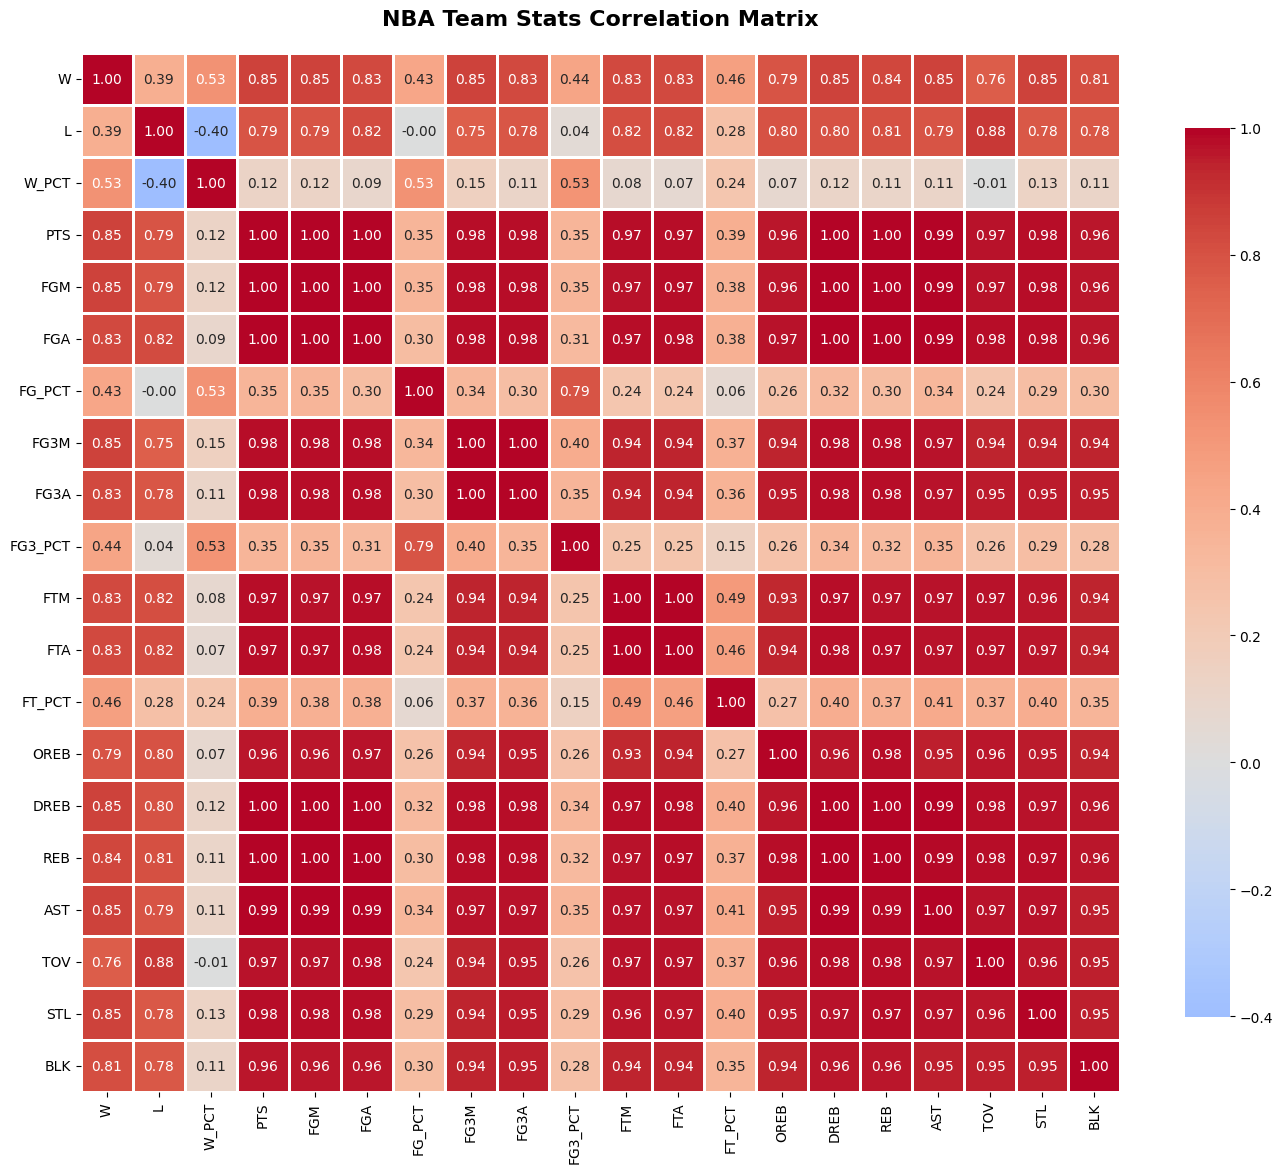

In [8]:
# heat map
plt.figure(figsize = (14,12))

# full correlation matrix
corr_matrix = teams_subset.corr()

# heat map
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm',
            center = 0, square = True, linewidths = 1, cbar_kws = {"shrink": 0.8})

plt.title('NBA Team Stats Correlation Matrix', fontsize = 16, fontweight = 'bold', pad = 20)
plt.tight_layout()
plt.savefig('../visualizations/correlation_heatmap.png', dpi = 300, bbox_inches = 'tight')
plt.show()

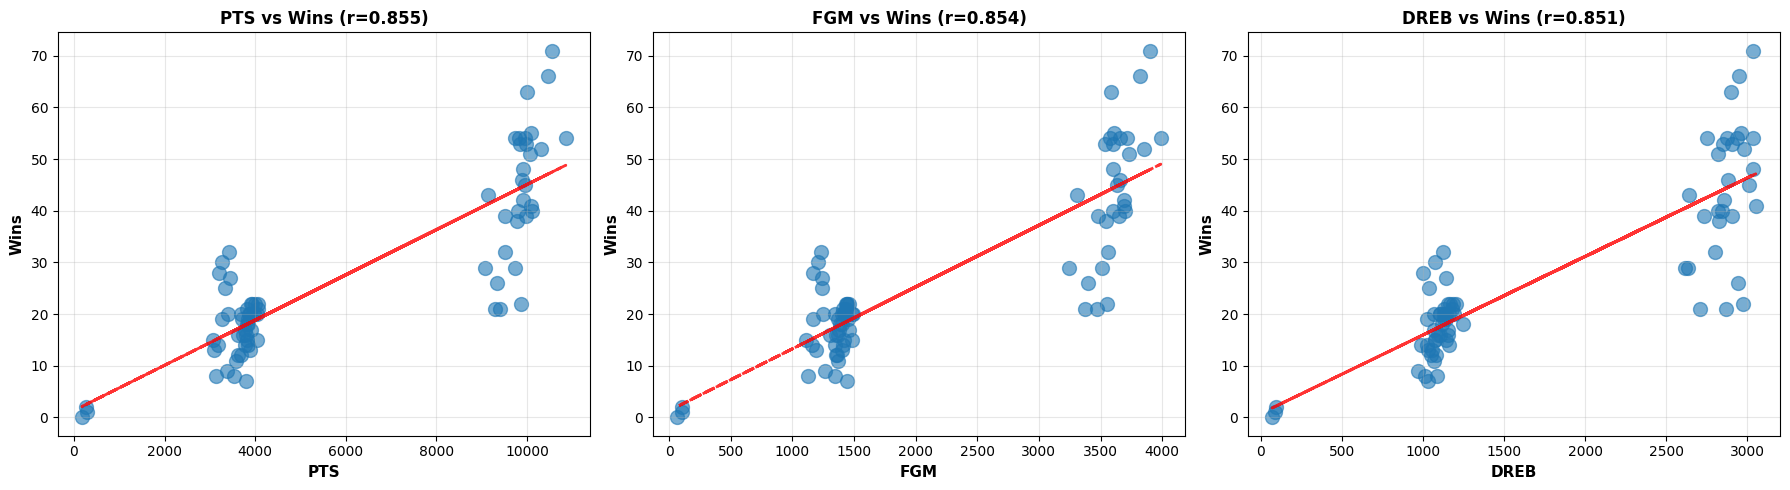

In [9]:
# top 3 stats correlated with wins - exclude w_pct and L
top_stats = correlations.drop(['W', 'W_PCT', 'L']).head(3)
fig, axes = plt.subplots(1,3, figsize = (18,5))
for idx, (stat, corr_value) in enumerate(top_stats.items()):
    ax = axes[idx]

    # scatter plot
    ax.scatter(teams_df[stat], teams_df['W'], alpha = 0.6, s = 100)

    # trendline
    z = np.polyfit(teams_df[stat], teams_df['W'], 1)
    p = np.poly1d(z)
    ax.plot(teams_df[stat], p(teams_df[stat]), "r--", alpha = 0.8, linewidth = 2)

    ax.set_xlabel(stat, fontsize = 11, fontweight = 'bold')
    ax.set_ylabel('Wins', fontsize = 11, fontweight = 'bold')
    ax.set_title(f"{stat} vs Wins (r={corr_value:.3f})", fontsize = 12, fontweight = 'bold')
    ax.grid(alpha = 0.3)

plt.tight_layout()
plt.savefig('../visualizations/top_correlations.png', dpi = 300, bbox_inches = 'tight')
plt.show()

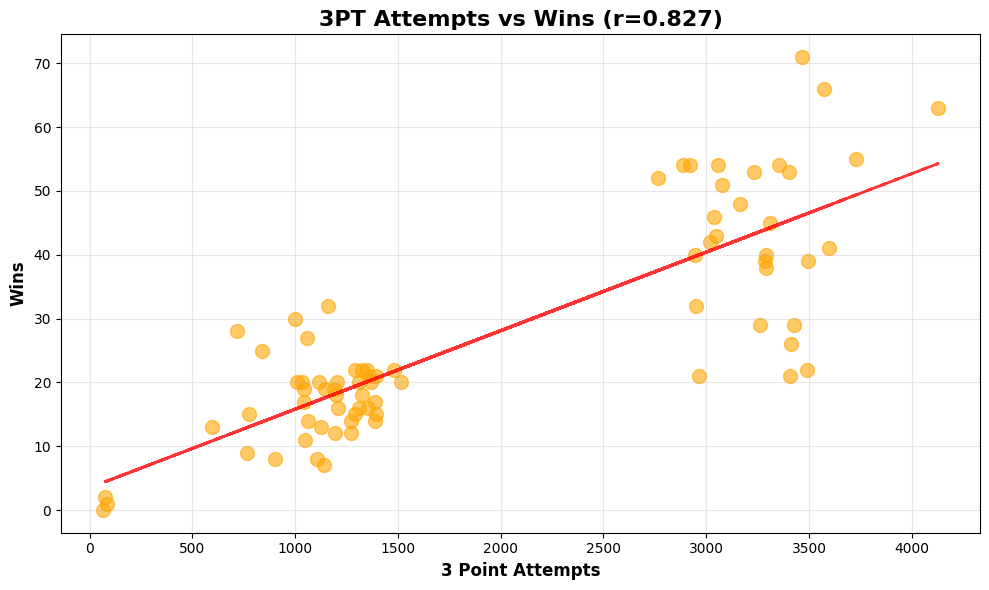


Correlation:0.827
Strong correlation


In [14]:
# hypothesis test - wins associated with 3 pointers
corr_3pt = teams_df['FG3A'].corr(teams_df['W'])

plt.figure(figsize = (10,6))
plt.scatter(teams_df['FG3A'], teams_df['W'], alpha = 0.6, s = 100, color = 'orange')

z = np.polyfit(teams_df['FG3A'], teams_df['W'], 1)
p = np.poly1d(z)
plt.plot(teams_df['FG3A'], p(teams_df['FG3A']), "r--", alpha= 0.8, linewidth = 2)

plt.xlabel('3 Point Attempts', fontsize = 12, fontweight = 'bold')
plt.ylabel('Wins', fontsize = 12, fontweight = 'bold')
plt.title(f'3PT Attempts vs Wins (r={corr_3pt:.3f})', fontsize = 16, fontweight = 'bold')
plt.grid(alpha= 0.3)
plt.tight_layout()
plt.savefig('../visualizations/3ptAttemps_Wins_Correlation.png')
plt.show()

print(f"\nCorrelation:{corr_3pt:.3f}")
if abs(corr_3pt) > 0.5:
    print("Strong correlation")
elif abs(corr_3pt) > 0.3:
    print ("Moderate correlation")
else:
    print("Weak correlation")